In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as pyo
import plotly.graph_objs as go
import dash
import dash_core_components as dcc
import dash_html_components as html
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc, adjusted_rand_score
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn import svm
from scipy.stats import pearsonr, spearmanr
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline


C:\Users\chemez\AppData\Local\Temp\ipykernel_12896\2446682584.py:7: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

C:\Users\chemez\AppData\Local\Temp\ipykernel_12896\2446682584.py:8: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`



In [2]:
import pandas as pd

# Read the CSV files
bank= pd.read_excel('CreditBank (1).xlsx',sheet_name='DataTrain')




C:\Users\chemez\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning:

Unknown extension is not supported and will be removed

C:\Users\chemez\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning:

Conditional Formatting extension is not supported and will be removed



## Data understanding

In [3]:
bank

,revenuAnnuel,autreRevenu,salaire,age,anneeTravaillee,nbDernierCreditRefuse,nbDernierCreditQccepte,PersonnesEnCharge,RevenuNetMoyen,nbVoitures,catgSocialePro,statutSocial,Residence,secteurTravail,Decision
0,29921.0,0,2493.416667,51,10,0,1,1,831.138889,2,Titular,Single,House Owner,Others,Accepted
1,22912.0,530,1379.333333,32,5,3,2,1,636.444444,1,Titular,Single,Living with parents,Developpement,Accepted
2,15780.0,0,1315.000000,30,5,3,0,2,438.333333,0,Titular,Single,Living with parents,Agriculture,Refused
3,31293.0,848,1759.750000,29,5,2,2,0,869.250000,1,Contractual,Single,Living with parents,Others,Accepted
4,14312.0,0,1192.666667,36,10,2,2,2,397.555556,1,Titular,Single,House Owner,Handwork,Tolerated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,25264.0,0,2105.333333,20,5,4,0,0,701.777778,2,Titular,Single,House Owner,Education,Tolerated
145,9251.0,0,770.916667,68,20,2,1,1,256.972222,1,Retired,Married,House Owner,Others,Refused
146,16901.0,0,1408.416667,50,2,3,0,3,469.472222,0,Contractual,Single,Float Owner,Manufacturing,Refused
147,28862.0,0,2405.166667,33,5,2,1,1,801.722222,0,Contractual,Single,Living with parents,Public Services,Accepted


In [4]:
bank.shape  


(149, 15)

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   revenuAnnuel            149 non-null    float64
 1   autreRevenu             149 non-null    int64  
 2   salaire                 149 non-null    float64
 3   age                     149 non-null    int64  
 4   anneeTravaillee         149 non-null    int64  
 5   nbDernierCreditRefuse   149 non-null    int64  
 6   nbDernierCreditQccepte  149 non-null    int64  
 7   PersonnesEnCharge       149 non-null    int64  
 8   RevenuNetMoyen          149 non-null    float64
 9   nbVoitures              149 non-null    int64  
 10  catgSocialePro          149 non-null    object 
 11  statutSocial            149 non-null    object 
 12  Residence               149 non-null    object 
 13  secteurTravail          149 non-null    object 
 14  Decision                149 non-null    ob

In [6]:
bank.isna().sum()

revenuAnnuel              0
autreRevenu               0
salaire                   0
age                       0
anneeTravaillee           0
nbDernierCreditRefuse     0
nbDernierCreditQccepte    0
PersonnesEnCharge         0
RevenuNetMoyen            0
nbVoitures                0
catgSocialePro            0
statutSocial              0
Residence                 0
secteurTravail            0
Decision                  0
dtype: int64

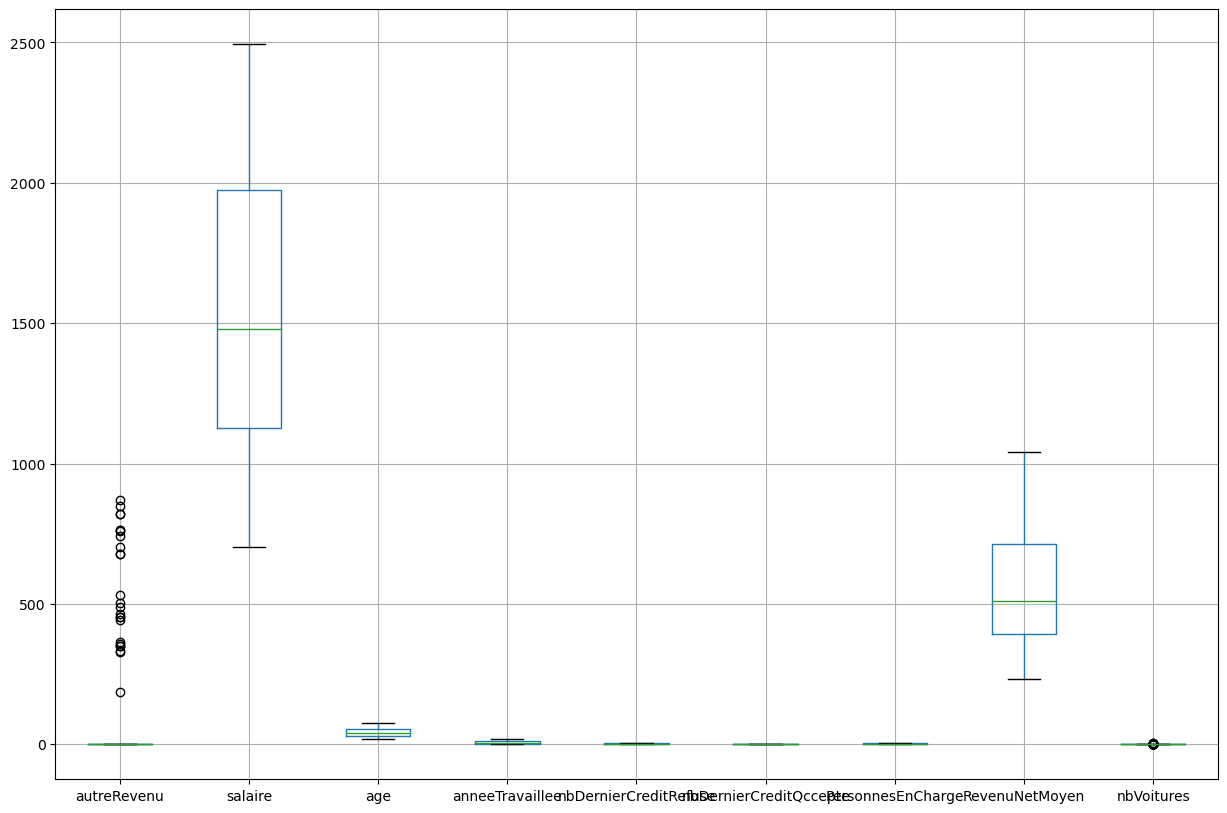

In [7]:
bank.iloc[:,1:].boxplot(figsize=(15,10));

In [8]:
bank.iloc[:,1:].corr()

,autreRevenu,salaire,age,anneeTravaillee,nbDernierCreditRefuse,nbDernierCreditQccepte,PersonnesEnCharge,RevenuNetMoyen,nbVoitures
autreRevenu,1.000000,0.041854,-0.073213,-0.101987,0.065395,-0.070225,0.010644,0.430667,-0.124461
salaire,0.041854,1.000000,-0.012765,0.069851,0.093648,0.011530,0.026273,0.919745,0.218751
age,-0.073213,-0.012765,1.000000,0.502728,-0.037666,0.127410,-0.094571,-0.040292,-0.076306
anneeTravaillee,-0.101987,0.069851,0.502728,1.000000,0.063569,0.112175,-0.036579,0.023030,0.127475
nbDernierCreditRefuse,0.065395,0.093648,-0.037666,0.063569,1.000000,-0.109996,0.078535,0.110284,0.012944
nbDernierCreditQccepte,-0.070225,0.011530,0.127410,0.112175,-0.109996,1.000000,-0.064031,-0.017173,0.133194
PersonnesEnCharge,0.010644,0.026273,-0.094571,-0.036579,0.078535,-0.064031,1.000000,0.027914,-0.017618
RevenuNetMoyen,0.430667,0.919745,-0.040292,0.023030,0.110284,-0.017173,0.027914,1.000000,0.148703
nbVoitures,-0.124461,0.218751,-0.076306,0.127475,0.012944,0.133194,-0.017618,0.148703,1.000000


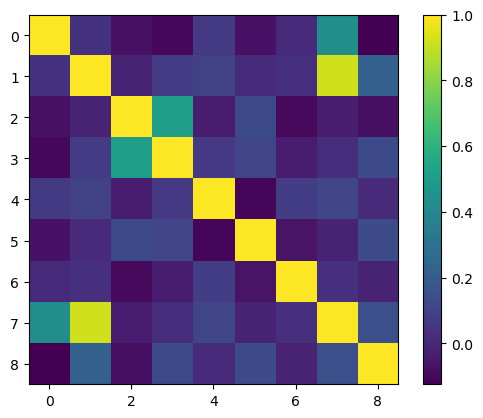

In [9]:
plt.imshow(bank.iloc[:,1:].corr());
plt.colorbar();

In [10]:
bank.columns

Index(['revenuAnnuel', 'autreRevenu', 'salaire', 'age', 'anneeTravaillee',
       'nbDernierCreditRefuse', 'nbDernierCreditQccepte', 'PersonnesEnCharge',
       'RevenuNetMoyen', 'nbVoitures', 'catgSocialePro', 'statutSocial',
       'Residence', 'secteurTravail', 'Decision'],
      dtype='object')

In [11]:
bank.describe()

,revenuAnnuel,autreRevenu,salaire,age,anneeTravaillee,nbDernierCreditRefuse,nbDernierCreditQccepte,PersonnesEnCharge,RevenuNetMoyen,nbVoitures
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,19472.194631,94.268456,1528.414430,41.973154,6.261745,2.120805,1.020134,1.852349,540.894295,1.073826
std,6900.738472,225.918415,519.454614,14.923203,5.320023,1.304425,0.817625,1.362509,191.687180,0.668742
min,8418.000000,0.000000,701.500000,20.000000,1.000000,0.000000,0.000000,0.000000,233.833333,0.000000
25%,14199.000000,0.000000,1127.583333,29.000000,2.000000,1.000000,0.000000,1.000000,394.416667,1.000000
50%,18416.000000,0.000000,1479.333333,39.000000,5.000000,2.000000,1.000000,2.000000,511.555556,1.000000
75%,25634.000000,0.000000,1974.666667,53.000000,10.000000,3.000000,2.000000,3.000000,712.055556,1.000000
max,37536.000000,871.000000,2493.416667,77.000000,20.000000,4.000000,2.000000,4.000000,1042.666667,3.000000


## DATA PREPARATION



In [12]:
import seaborn as sb
import numpy as np

features = [ 'autreRevenu', 'nbVoitures']

def impute(bank, feature):
    q1 = np.percentile(bank[feature] , 25)
    q3 = np.percentile(bank[feature] , 75)
    iqr = q3 - q1 
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    bank.loc[bank[feature] < lower, feature] = lower
    bank.loc[bank[feature] > upper, feature] = upper

for feature in features:
    impute(bank, feature)

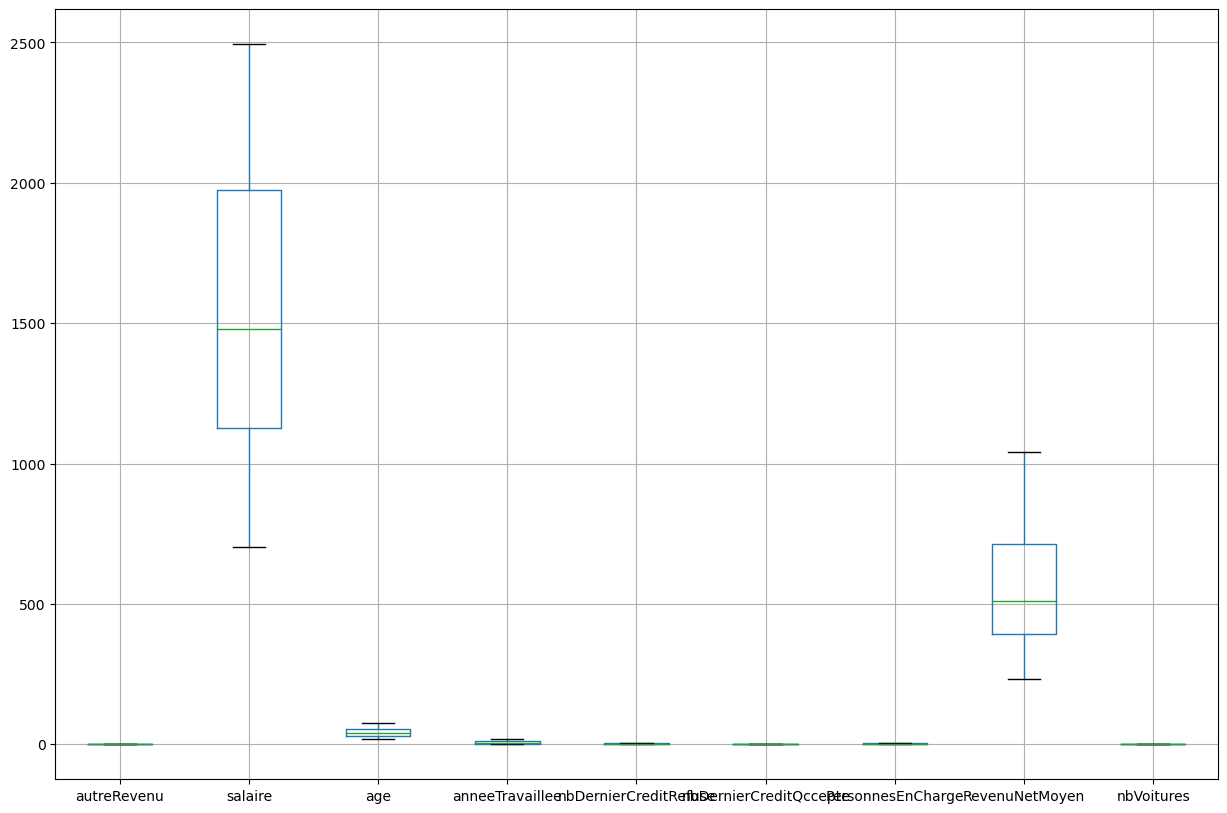

In [13]:
bank.iloc[:,1:].boxplot(figsize=(15,10));

In [14]:
bank.columns

Index(['revenuAnnuel', 'autreRevenu', 'salaire', 'age', 'anneeTravaillee',
       'nbDernierCreditRefuse', 'nbDernierCreditQccepte', 'PersonnesEnCharge',
       'RevenuNetMoyen', 'nbVoitures', 'catgSocialePro', 'statutSocial',
       'Residence', 'secteurTravail', 'Decision'],
      dtype='object')

In [15]:
##encodage
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
#bank['Decision'] = encoder.fit_transform(bank['Decision'])
bank['secteurTravail'] = encoder.fit_transform(bank['secteurTravail'])
bank['Residence'] = encoder.fit_transform(bank['Residence'])
bank['statutSocial'] = encoder.fit_transform(bank['statutSocial'])
bank['catgSocialePro'] = encoder.fit_transform(bank['catgSocialePro'])


In [16]:
bank

,revenuAnnuel,autreRevenu,salaire,age,anneeTravaillee,nbDernierCreditRefuse,nbDernierCreditQccepte,PersonnesEnCharge,RevenuNetMoyen,nbVoitures,catgSocialePro,statutSocial,Residence,secteurTravail,Decision
0,29921.0,0,2493.416667,51,10,0,1,1,831.138889,1,2,1,1,6,Accepted
1,22912.0,0,1379.333333,32,5,3,2,1,636.444444,1,2,1,2,2,Accepted
2,15780.0,0,1315.000000,30,5,3,0,2,438.333333,1,2,1,2,0,Refused
3,31293.0,0,1759.750000,29,5,2,2,0,869.250000,1,0,1,2,6,Accepted
4,14312.0,0,1192.666667,36,10,2,2,2,397.555556,1,2,1,1,4,Tolerated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,25264.0,0,2105.333333,20,5,4,0,0,701.777778,1,2,1,1,3,Tolerated
145,9251.0,0,770.916667,68,20,2,1,1,256.972222,1,1,0,1,6,Refused
146,16901.0,0,1408.416667,50,2,3,0,3,469.472222,1,0,1,0,5,Refused
147,28862.0,0,2405.166667,33,5,2,1,1,801.722222,1,0,1,2,7,Accepted


In [17]:
ss = StandardScaler()
numerical_cols = ['revenuAnnuel', 'autreRevenu', 'salaire', 'age', 'anneeTravaillee',
       'nbDernierCreditRefuse', 'nbDernierCreditQccepte', 'PersonnesEnCharge',
       'RevenuNetMoyen', 'nbVoitures', 'catgSocialePro', 'statutSocial',
       'Residence', 'secteurTravail'] # replace with actual numerical column names
bank_cp = bank[numerical_cols]
ssr = ss.fit_transform(bank_cp)
bank_rescaled = pd.DataFrame(ssr, columns=numerical_cols)

In [18]:
bank_rescaled.tail()

,revenuAnnuel,autreRevenu,salaire,age,anneeTravaillee,nbDernierCreditRefuse,nbDernierCreditQccepte,PersonnesEnCharge,RevenuNetMoyen,nbVoitures,catgSocialePro,statutSocial,Residence,secteurTravail
144,0.842133,0.0,1.114370,-1.477381,-0.237969,1.445490,-1.251888,-1.364099,0.842133,0.0,0.804302,0.903921,0.085447,-0.544981
145,-1.486170,0.0,-1.463174,1.749934,2.591077,-0.092924,-0.024708,-0.627683,-1.486170,0.0,-0.295157,-1.106291,0.085447,0.626204
146,-0.373854,0.0,-0.231786,0.539691,-0.803778,0.676283,-1.251888,0.845148,-0.373854,0.0,-1.394616,0.903921,-1.329180,0.235809
147,1.365285,0.0,1.693525,-0.603317,-0.237969,-0.092924,-0.024708,-0.627683,1.365285,0.0,-1.394616,0.903921,1.500075,1.016599
148,-0.859638,0.0,-0.769573,-1.275674,0.705046,0.676283,-0.024708,0.108732,-0.859638,0.0,0.804302,-1.106291,-1.329180,1.406994


In [ ]:
##Predire


## Modeling

In [19]:
# Séparer les features et la variable cible
X = bank_rescaled[[ 'salaire', 'age', 'anneeTravaillee',
       'nbDernierCreditRefuse', 'nbDernierCreditQccepte', 'PersonnesEnCharge',
       'RevenuNetMoyen', 'nbVoitures', 'catgSocialePro', 'statutSocial',
       'Residence', 'secteurTravail']]
y = bank['Decision']

In [21]:
X

,salaire,age,anneeTravaillee,nbDernierCreditRefuse,nbDernierCreditQccepte,PersonnesEnCharge,RevenuNetMoyen,nbVoitures,catgSocialePro,statutSocial,Residence,secteurTravail
0,1.863987,0.606927,0.705046,-1.631339,-0.024708,-0.627683,1.519264,0.0,0.804302,0.903921,0.085447,0.626204
1,-0.287963,-0.670552,-0.237969,0.676283,1.202471,-0.627683,0.500150,0.0,0.804302,0.903921,1.500075,-0.935376
2,-0.412229,-0.805024,-0.237969,0.676283,-1.251888,0.108732,-0.536848,0.0,0.804302,0.903921,1.500075,-1.716166
3,0.446845,-0.872260,-0.237969,-0.092924,1.202471,-1.364099,1.718754,0.0,-1.394616,0.903921,1.500075,0.626204
4,-0.648527,-0.401610,0.705046,-0.092924,1.202471,0.108732,-0.750296,0.0,0.804302,0.903921,0.085447,-0.154586
...,...,...,...,...,...,...,...,...,...,...,...,...
144,1.114370,-1.477381,-0.237969,1.445490,-1.251888,-1.364099,0.842133,0.0,0.804302,0.903921,0.085447,-0.544981
145,-1.463174,1.749934,2.591077,-0.092924,-0.024708,-0.627683,-1.486170,0.0,-0.295157,-1.106291,0.085447,0.626204
146,-0.231786,0.539691,-0.803778,0.676283,-1.251888,0.845148,-0.373854,0.0,-1.394616,0.903921,-1.329180,0.235809
147,1.693525,-0.603317,-0.237969,-0.092924,-0.024708,-0.627683,1.365285,0.0,-1.394616,0.903921,1.500075,1.016599


In [22]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Créer un modèle d'arbre de décision
decision_tree = DecisionTreeClassifier()

# Entraîner le modèle sur les données d'entraînement
decision_tree.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred_tree = decision_tree.predict(X_test)

# Calculer la précision du modèle
accuracy = accuracy_score(y_test, y_pred_tree)
print("Précision : %.2f%%" % (accuracy * 100.0))

Précision : 80.00%


In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Créer un objet KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Entraîner le modèle
knn.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred_knn = knn.predict(X_test)

# Calculer l'accuracy du modèle
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy : {:.2f}%".format(accuracy*100))

Accuracy : 60.00%


## Evaluation

In [44]:
banktest= pd.read_excel('CreditBank (1).xlsx',sheet_name='DataTest')

C:\Users\chemez\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning:

Unknown extension is not supported and will be removed

C:\Users\chemez\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning:

Conditional Formatting extension is not supported and will be removed



In [45]:
banktest

,revenuAnnuel,autreRevenu,salaire,age,anneeTravaillee,nbDernierCreditRefuse,nbDernierCreditQccepte,PersonnesEnCharge,RevenuNetMoyen,nbVoitures,catgSocialePro,statutSocial,Residence,secteurTravail,Decision
0,11181.0,0,931.750000,45,2,4,2,4,310.583333,1,Contractual,Married,House Owner,Public Services,Refused
1,27475.0,0,2289.583333,34,5,0,1,2,763.194444,0,Contractual,Single,House Owner,Public Services,Accepted
2,21947.0,0,1828.916667,27,10,0,2,4,609.638889,2,Titular,Single,House Owner,Education,Accepted
3,28378.0,687,1677.833333,38,5,0,2,1,788.277778,1,Contractual,Single,Living with parents,Others,Accepted
4,12007.0,0,1000.583333,24,2,0,2,1,333.527778,1,Titular,Married,House Owner,Manufacturing,Refused
5,28085.0,0,2340.416667,50,5,4,0,2,780.138889,1,Titular,Married,Float Owner,Public Services,Tolerated
6,21409.0,0,1784.083333,24,5,3,0,2,594.694444,0,Titular,Single,Living with parents,Telecommunication,Refused
7,22858.0,0,1904.833333,45,5,2,0,3,634.944444,1,Contractual,Single,Float Owner,Commerce,Tolerated
8,22509.0,0,1875.750000,32,5,2,1,0,625.250000,1,Titular,Married,Float Owner,Telecommunication,Accepted
9,26410.0,0,2200.833333,22,10,2,1,2,733.611111,1,Contractual,Single,Living with parents,Developpement,Accepted


In [46]:
##encodage
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
#bank['Decision'] = encoder.fit_transform(bank['Decision'])
banktest['secteurTravail'] = encoder.fit_transform(banktest['secteurTravail'])
banktest['Residence'] = encoder.fit_transform(banktest['Residence'])
banktest['statutSocial'] = encoder.fit_transform(banktest['statutSocial'])
banktest['catgSocialePro'] = encoder.fit_transform(banktest['catgSocialePro'])


In [48]:
X1 = banktest[[ 'salaire', 'age', 'anneeTravaillee',
       'nbDernierCreditRefuse', 'nbDernierCreditQccepte', 'PersonnesEnCharge',
       'RevenuNetMoyen', 'nbVoitures', 'catgSocialePro', 'statutSocial',
       'Residence', 'secteurTravail']]
y1 = banktest['Decision']

In [49]:
X1

,salaire,age,anneeTravaillee,nbDernierCreditRefuse,nbDernierCreditQccepte,PersonnesEnCharge,RevenuNetMoyen,nbVoitures,catgSocialePro,statutSocial,Residence,secteurTravail
0,931.750000,45,2,4,2,4,310.583333,1,0,0,1,7
1,2289.583333,34,5,0,1,2,763.194444,0,0,1,1,7
2,1828.916667,27,10,0,2,4,609.638889,2,2,1,1,3
3,1677.833333,38,5,0,2,1,788.277778,1,0,1,2,6
4,1000.583333,24,2,0,2,1,333.527778,1,2,0,1,5
5,2340.416667,50,5,4,0,2,780.138889,1,2,0,0,7
6,1784.083333,24,5,3,0,2,594.694444,0,2,1,2,8
7,1904.833333,45,5,2,0,3,634.944444,1,0,1,0,1
8,1875.750000,32,5,2,1,0,625.250000,1,2,0,0,8
9,2200.833333,22,10,2,1,2,733.611111,1,0,1,2,2


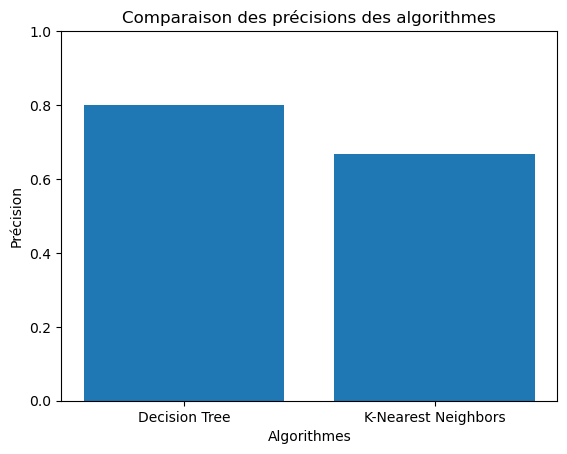

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Créer un modèle d'arbre de décision
decision_tree = DecisionTreeClassifier()
# Entraîner le modèle sur les données d'entraînement
decision_tree.fit(X_train, y_train)
# Faire des prédictions sur les données de test
y_pred_tree = decision_tree.predict(X_test)
# Calculer la précision du modèle
accuracy_tree = accuracy_score(y_test, y_pred_tree)

# Créer un objet KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
# Entraîner le modèle
knn.fit(X_train, y_train)
# Faire des prédictions sur l'ensemble de test
y_pred_knn = knn.predict(X_test)
# Calculer la précision du modèle
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Précisions des deux algorithmes
precisions = [accuracy_tree, accuracy_knn]

# Noms des algorithmes
algorithmes = ['Decision Tree', 'K-Nearest Neighbors']

# Création du graphique
plt.bar(algorithmes, precisions)
plt.xlabel('Algorithmes')
plt.ylabel('Précision')
plt.title('Comparaison des précisions des algorithmes')
plt.ylim(0, 1.0)

# Affichage du graphique
plt.show()


Lorsque vous comparez les résultats des deux algorithmes, vous constatez que le premier algorithme (Decision Tree) a une précision de 80%, tandis que le deuxième algorithme (K-Nearest Neighbors) a une précision de 60%.

Cela signifie que, dans votre cas, l'algorithme de l'arbre de décision (Decision Tree) a une performance supérieure en termes de précision par rapport à l'algorithme des K plus proches voisins (K-Nearest Neighbors). La précision mesure la proportion des prédictions correctes faites par l'algorithme sur les données de test. Ainsi, un algorithme avec une précision plus élevée est généralement considéré comme meilleur dans ce contexte.

Cependant, il est important de noter que la précision seule ne suffit pas à évaluer complètement la performance d'un algorithme. Il peut être utile d'examiner d'autres mesures d'évaluation telles que le rappel, la courbe ROC, la matrice de confusion, etc., en fonction de votre problème spécifique et des objectifs de votre modèle.

Il est également recommandé de prendre en compte d'autres facteurs tels que la complexité de l'algorithme, le temps d'entraînement et de prédiction, ainsi que les exigences en termes de données pour chaque algorithme avant de prendre une décision finale sur le choix de l'algorithme le plus approprié pour votre problème.

## Test

In [38]:
from sklearn.tree import DecisionTreeClassifier

# Créer un modèle d'arbre de décision
decision_tree = DecisionTreeClassifier()

# Entraîner le modèle sur l'ensemble complet de données (X, y)
decision_tree.fit(X1, y1)

# Prédire une nouvelle observation pour l'algorithme de l'arbre de décision
new_observation = [[1.863987,0.606927,0.705046,-1.631339,-0.024708,-0.627683,1.519264,0.0,0.804302,0.903921,0.085447,0.626204]]  # Remplacez les valeurs avec vos propres données
prediction_tree = decision_tree.predict(new_observation)
print("Prédiction de l'arbre de décision :", prediction_tree)

Prédiction de l'arbre de décision : ['Accepted']


C:\Users\chemez\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Créer un modèle d'arbre de décision
decision_tree = DecisionTreeClassifier()

# Entraîner le modèle sur l'ensemble complet de données (X, y)
decision_tree.fit(X, y)

# Prédire une nouvelle observation pour l'algorithme de l'arbre de décision.

new_observation = np.array([2289.583333,34,5,0,1,2,763.194444,0,0,1,1,7])  # Remplacez les valeurs avec vos propres données
new_observation = new_observation.reshape(1, -1)  # Convertir en une matrice 2D
prediction_tree = decision_tree.predict(new_observation)
print("Prédiction de l'arbre de décision :", prediction_tree)

Prédiction de l'arbre de décision : ['Accepted']


C:\Users\chemez\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

